In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import copy
import math

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
import matplotlib.patches as patches

import glob

import pandas as pd
# ma is "masked array" - this is what the netCDF4 module uses
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

ModuleNotFoundError: No module named 'xarray'

In [1]:
# Coarsen elavation dataset
coarsen_step_coarse = 10
coarsen_step_fine = 2

elav = xr.open_dataset('/home/student.unimelb.edu.au/shorte1/Documents/phd/confirmation/etopo1.nc')
lon = elav.lon.values
lat = elav.lat.values
elav = elav.Band1.values

nLon_coarse = len(lon)//coarsen_step_coarse
nLat_coarse = len(lat)//coarsen_step_coarse

nLon_fine = len(lon)//coarsen_step_fine
nLat_fine = len(lat)//coarsen_step_fine

elav_coarse = np.empty((nLat_coarse, nLon_coarse))
elav_fine = np.empty((nLat_fine, nLon_fine))

for i in np.arange(0, nLat_fine):
    for j in np.arange(0, nLon_fine):
        elav_fine[i,j] = np.mean(elav[i * coarsen_step_fine : (i+1) * coarsen_step_fine,
                                   j * coarsen_step_fine : (j+1) * coarsen_step_fine])

lon_fine = np.mean(lon[:(len(lon)//coarsen_step_fine)*coarsen_step_fine].reshape(-1,coarsen_step_fine), axis=1)
lat_fine = np.mean(lat[:(len(lat)//coarsen_step_fine)*coarsen_step_fine].reshape(-1,coarsen_step_fine), axis=1)

# [X_coarse, Y_coarse] = np.meshgrid(lon_coarse, lat_coarse)
[X_fine, Y_fine] = np.meshgrid(lon_fine, lat_fine)

# for i in np.arange(0, nLat_coarse):
#     for j in np.arange(0, nLon_coarse):
#         elav_coarse[i,j] = np.mean(elav[i * coarsen_step_coarse : (i+1) * coarsen_step_coarse,
#                                    j * coarsen_step_coarse : (j+1) * coarsen_step_coarse])

for i in np.arange(0, nLat_fine):
    for j in np.arange(0, nLon_fine):
        elav_fine[i,j] = np.mean(
            elav[i * coarsen_step_fine : (i+1) * coarsen_step_fine,
            j * coarsen_step_fine : (j+1) * coarsen_step_fine])

NameError: name 'xr' is not defined

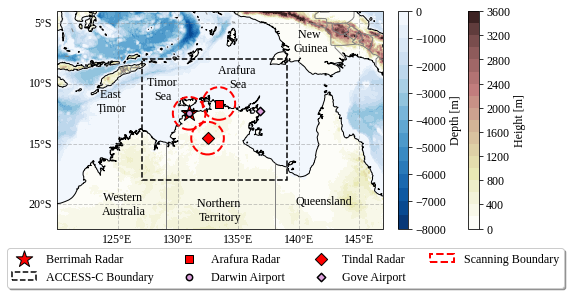

In [37]:
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Liberation Serif'})
rcParams.update({'mathtext.fontset': 'dejavuserif'})
rcParams.update({'font.size': 12})

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', zorder=0)

ax.set_extent([120, 147, -4, -22], crs=ccrs.PlateCarree())
grid = ax.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1, color='gray', alpha=0.4, linestyle='--')

grid.xlocator = mticker.FixedLocator([120, 125, 130, 135, 140, 145, 150])
grid.ylocator = mticker.FixedLocator([-5, -10, -15, -20, -25])

c_land = tuple(np.array([249.0, 246.0, 216.0])/256)
c_water = tuple(np.array([220.0, 240.0, 250.0])/256)

land_10m = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m', edgecolor='face', facecolor=c_land)

ocean_10m = cfeature.NaturalEarthFeature(
    'physical', 'ocean', '10m', edgecolor='face', facecolor=c_water)

lakes_10m = cfeature.NaturalEarthFeature(
    'physical', 'lakes', '10m', edgecolor='face', facecolor=c_water)

states_provinces_10m = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')

# ax.add_feature(land_10m, edgecolor='black', linewidth = 0.5, zorder=0)
# ax.add_feature(ocean_10m, edgecolor='black', linewidth = 0.5, zorder=0)
ax.add_feature(states_provinces_10m, edgecolor='grey', zorder=0)

tMin = 0
tMax = 3600
tStep = 200

tStepOcean = 500
tMinOcean = -8000
tMaxOcean = 0

csetLand = ax.contourf(
    X_fine, Y_fine, elav_fine, cmap='pink_r', 
    levels=np.arange(tMin,tMax+tStep,tStep), zorder=0)
cbar_l = fig.colorbar(csetLand, pad=-.001)
cbar_l.set_label('Height [m]')
csetWater = ax.contourf(
    X_fine, Y_fine, elav_fine, cmap='Blues_r',
    levels=np.arange(tMinOcean,tMaxOcean+tStepOcean,tStepOcean),
    zorder=0)
cbar_w = fig.colorbar(csetWater, pad=.03)
cbar_w.set_label('Depth [m]')

# axins = inset_axes(
#     ax, width="100%", height="5%", loc='lower center', borderpad=-5)
# fig.colorbar(im, cax=axins, orientation="horizontal")

grid.right_labels = False
grid.top_labels = False

# ax.plot(lon_s,lat_s,'-r', marker='.', label='RV Investigator Path')
ax.scatter(
    [130.925], [-12.457], marker='*', s=300, color='red', 
    edgecolors='k', label='Berrimah Radar')
ax.scatter(
    [133.38], [-11.6485], marker='s', s=75, color='red', 
    edgecolors='k', label='Arafura Radar')
ax.scatter(
    [132.446], [-14.513], marker='D', s=75, color='red', 
    edgecolors='k', label='Tindal Radar')

ax.scatter(
    [130.89], [-12.42], marker='o', s=40, color='plum', 
    edgecolors='k', label='Darwin Airport', linewidth=1.5)

ax.scatter(
    [136.81], [-12.28], marker='D', s=35, color='plum', 
    edgecolors='k', label='Gove Airport', linewidth=1.5)

ax.text(125.5, -20, 'Western \nAustralia', fontsize=12, ha='center', va='center')
ax.text(124.5, -11.5, 'East \nTimor', fontsize=12, ha='center', va='center')
ax.text(133.5, -20.5, 'Northern \nTerritory', fontsize=12, ha='center', va='center')
ax.text(139.75, -20, 'Queensland', fontsize=12)
ax.text(141, -6.5, 'New \nGuinea', fontsize=12, ha='center', va='center')
ax.text(128.75, -10.5, 'Timor \nSea', fontsize=12, ha='center', va='center')
ax.text(135, -9.5, 'Arafura \nSea', fontsize=12, ha='center', va='center')

B_radius = plt.Circle(
    (130.925, -12.457), 150/111, edgecolor='red', linestyle='--', 
    facecolor='none', linewidth=2, label='Scanning Boundary')
A_radius = plt.Circle(
    (133.38, -11.6485), 150/111, edgecolor='red', linestyle='--', 
    facecolor='none', linewidth=2)
T_radius = plt.Circle(
    (132.446, -14.513), 150/111, edgecolor='red', linestyle='--', 
    facecolor='none', linewidth=2)
ax.add_patch(B_radius)
ax.add_patch(A_radius)
ax.add_patch(T_radius)

ACCESS_C_bounds = plt.Rectangle(
    (126.99296,-7.9695), 12.028496, -10.0305, ec="black", fc='none', 
    linestyle='--', linewidth=1.5, label='ACCESS-C Boundary')
ax.add_patch(ACCESS_C_bounds)

handles, labels = ax.get_legend_handles_labels()

new_order = [2, 1, 3, 5, 4, 6, 0]
handles = [handles[i] for i in new_order]
labels = [labels[i] for i in new_order]

plt.legend(
    handles, labels,
    loc='lower center', bbox_to_anchor=(.7, -0.3),
    ncol=4, fancybox=True, shadow=True)

plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/phd/ACCESS_C_paper/map.png', 
    dpi=200, bbox_inches='tight', facecolor='w')

In [8]:
test_dir = 'https://dapds00.nci.org.au/thredds/dodsC/wr45/'
test_dir += 'ops_aps3/access-dn/3001/20200909/0000/an/sfc/uwnd10m.nc'

test = xr.open_dataset(test_dir)

In [18]:
test.lon[-1]-test.lon[0]

<xarray.DataArray 'lon' ()>
array(12.028496, dtype=float32)